## Handling Missing Values
[Referensi Bacaan](https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc)

### DATA DICTIONARY

Suburb: Pinggir Kota

Address: Alamat

Rooms: Jumlah Kamar

Price: Harga dalam satuan AUD

<br>

Method:  
S - property sold; Properti Terjual  
SP - property sold prior; Properti Terjual sebelum auction  
PI - property passed in; Bid lebih rendah dari threshold yg dipasang vendor  
SN - sold not disclosed; Terjual dan harga tidak dipublikasikan  
VB - vendor bid; vendor membuat penawaran  
W - withdrawn prior to auction; mengundurkan diri dari Auction  
SA - sold after auction; Terjual Setelah Auction berakhir  
SS - sold after auction price not disclosed. Terjual setelah auction dan harga tidak dipublikasikan   

Type:

h - house  
u - unit  
t - townhouse  

<br>

SellerG: Real Estate Agent

Date: Tanggal Terjual

Distance: Jarak dari CBD dalam Kilometer

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Jumlah properti yang ada di suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Jumlah kamar mandi

Car: Jumlah garasi mobil

Landsize: Luas Tanah dalam sqm

BuildingArea: Luas Bangunan dalam sqm

YearBuilt: Tahun Rumah dibuat

CouncilArea: Governing council for the area

Lattitude: Self explanatory

Longtitude: Self explanatory

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Read Data

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv', parse_dates=['Date']) # Agar Column Date menjadi Datetime

In [3]:
pd.options.display.max_columns = 999 # agar tampil semua kolom

In [4]:
df.head() # 5 data teratas

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
# menampilkan jumlah kolom dan baris

print("Jumlah kolom :", df.shape[1])
print("Jumlah baris :", df.shape[0]) 

Jumlah kolom : 21
Jumlah baris : 34857


## Describe Data

In [6]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

,Features,D types,Null,Null%,Unique,Unique Value
0,Suburb,object,0,0.00,351,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,object,0,0.00,34009,"[68 Studley St, 85 Turner St, 25 Bloomburg St,..."
2,Rooms,int64,0,0.00,12,"[2, 3, 4, 1, 5, 6, 7, 8, 10, 9, 12, 16]"
3,Type,object,0,0.00,3,"[h, u, t]"
4,Price,float64,7610,21.83,2871,"[nan, 1480000.0, 1035000.0, 1465000.0, 850000...."
5,Method,object,0,0.00,9,"[SS, S, VB, SP, PI, SN, W, PN, SA]"
6,SellerG,object,0,0.00,388,"[Jellis, Biggin, Rounds, Nelson, Collins, Ding..."
7,Date,datetime64[ns],0,0.00,78,"[2016-03-09T00:00:00.000000000, 2016-03-12T00:..."
8,Distance,float64,1,0.00,215,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,float64,1,0.00,211,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


- Berdasarkan data diatas, terlihat kolom target memiliki missing values sebesar 7610 data atau sekitar 21.8% dari total data. Untuk itu, dropna pada missing values pada kolom target akan dilakukan.
- Kolom Bedroom2 seperti yang sudah dicantumkan diatas memiliki informasi yang sama dengan rooms sifatnya hanya tambahan, maka drop columns akan dilakukan terhadap kolom Bedroom2
- Untuk kolom-kolom lain yang memiliki missing values akan dihandle dengan mengelompokkan nya berdasarkan jumlah Nan nya terlebih dahulu agar lebih mudah untuk memikirkan langkah yang akan diambil selanjutnya.
- Terlihat juga data types tiap kolom sudah sesuai dengan jenis valuesnya, untuk kolom date sudah dilakukan perubahan menjadi datetime64 pada saat membaca data.

In [7]:
# Descriptive stats
df.describe().T

# Terlihat adanya min 0 values di kolom distance, car, bathroom, Landsize dan BuildingArea
# Untuk distance karena memang ini jarak rumah ke area cbd dalam km jadi sangat normal jika ada 0 values
# begitu pula dengan car karena isi kolom merupakan ketersediaan lahan parkir jadi 0 memiliki arti tidak ada space untuk parkir mobil.
# Akan dilakukan pengecekan lebih lanjut ke kolom bathroom, Landsize dan BuildingArea

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [8]:
# Descriptive statistic for object types
df.describe(include='O').T

# Most frequent of Suburb is Reservoir and majority of house type is h, most sales done by seller Jellis

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


## Handling Missing Values

### DROPNA

In [9]:
# Drop rows missing values dari kolom target (price)

df.drop(df.loc[df['Price'].isna()].index, inplace=True)

In [10]:
df.loc[df['Price'].isna()]

# Cek ulang untuk memastikan sudah di drop

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [11]:
# Drop columns Bedroom2 karena memiliki informasi yang sama seperti Rooms

df.drop(columns=['Bedroom2'], axis=1, inplace=True)

In [12]:
# re-check columns
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [13]:
# Dropna Distance, Postcode, CouncilArea, Regionname, Propertycount missing values (Missing values hanya dibawah 5)

df.drop(df.loc[df['Distance'].isna()].index, inplace=True)
df.drop(df.loc[df['Postcode'].isna()].index, inplace=True)
df.drop(df.loc[df['CouncilArea'].isna()].index, inplace=True)
df.drop(df.loc[df['Regionname'].isna()].index, inplace=True)
df.drop(df.loc[df['Propertycount'].isna()].index, inplace=True)

In [14]:
# resetting the index
df.reset_index(inplace=True, drop=True)

In [15]:
df.isna().sum()

# Check column yang sudah di dropna diatas

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

### Impute/Fillna

Columns dengan Nan% lebih dari 50%
#### Landsize

In [16]:
df.loc[(df['BuildingArea'].isna()) & (df['Landsize'].isna())]

# Setelah melihat column Building Area dan Landsize yang Nan, untuk mengisi missing valuesnya perlu untuk melihat dari rata2 BuildingArea dan LandSize dari daerahnya terlebih dahulu.
# Karena jumlah unique postcode mencapai puluhan ribu dan suburb mencapai ratusan, maka saya memilih daerah berdasarkan CouncilArea yang berjumlah 33 dan tidak ada missing values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27228,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27229,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27233,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [17]:
ps= df.loc[(df['BuildingArea'].isna()) & (df['Landsize'].isna()),'CouncilArea'].unique()

# Store ke variabel, CouncilArea daerah rumah yang landsize dan building sizenya Nan

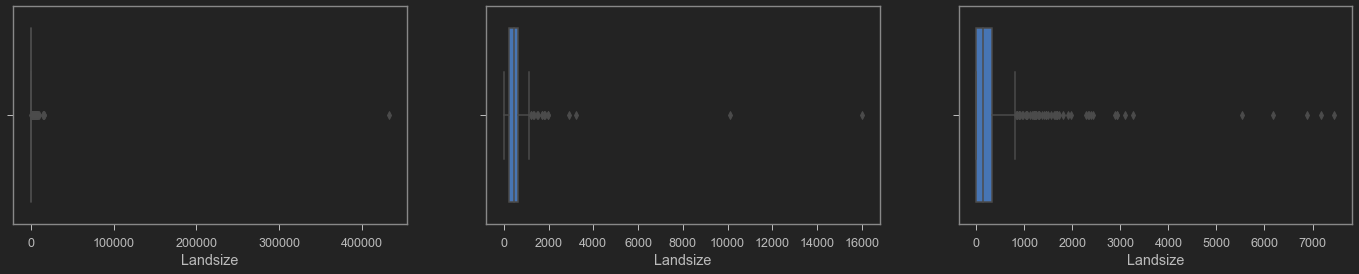

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[0]),'Landsize'], ax=axes[0]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[1]),'Landsize'], ax=axes[1]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[2]),'Landsize'], ax=axes[2]);
plt.show()

# Karena banyak outliers pada landsize di setiap Council Area maka akan melakukan fillna dengan median

In [19]:
mask = (df['Landsize'].isna()) # dimasukkan ke variable agar lebih praktis sedikit
# df.loc[(df['Postcode']==ps[1]) & (df['Rooms']==1)]

In [20]:
price_range1 = (df['Price']>0) & (df['Price']<=500000)
price_range2 = (df['Price']>500000) & (df['Price']<=1000000)
price_range3 = (df['Price']>1000000) & (df['Price']<=2000000)
price_range4 = (df['Price']>2000000) & (df['Price']<=3000000)
price_range5 = (df['Price']>3000000) & (df['Price']<=4000000)
price_range6 = (df['Price']>4000000) & (df['Price']<=5000000)
price_range7 = (df['Price']>5000000)

In [21]:
for i in range(len(ps)):
    for j in df['Type'].unique():
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range1, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range1, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range1, 'Landsize'].median())
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range2, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range2, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range2, 'Landsize'].median())
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range3, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range3, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range3, 'Landsize'].median())
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range4, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range4, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range4, 'Landsize'].median())
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range5, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range5, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range5, 'Landsize'].median())
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range6, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range6, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range6, 'Landsize'].median())
        df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j) & price_range7, 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Type']==j)&price_range7, 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Type']==j)&price_range7, 'Landsize'].median())


# Mengisi Missing value Landsize dengan median berdasarkan nilai median Landsize dari tiap CouncilArea, tiap Tipe dan price range per rumah

In [22]:
print(f"Missing Value yang tersisa: {df['Landsize'].isna().sum()}")

# Tersisa 53 Missing Values Landsize

Missing Value yang tersisa: 53


In [23]:
r1=df.loc[(df['Landsize'].isna()),'CouncilArea'].unique()
for i in r1:
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range1 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range1,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range1,'Landsize'].median())
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range2 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range2,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range2,'Landsize'].median())
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range3 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range3,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range3,'Landsize'].median())
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range4 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range4,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range4,'Landsize'].median())
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range5 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range5,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range5,'Landsize'].median())
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range6 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range6,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range6,'Landsize'].median())
    df.loc[(df['Landsize'].isna()) & (df['CouncilArea']==i) & price_range7 ,'Landsize'] = df.loc[(df['CouncilArea']==i) & (df['Landsize'].isna()) & price_range7,'Landsize'].fillna(df.loc[(df['CouncilArea']==i) & price_range7,'Landsize'].median())

# Fillna Landsize dengan median berdasarkan jumlah Council Area dan price range nya

In [24]:
# Check ulang hasil fillna
df.loc[(df['Landsize'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17443,Croydon,5 Kenmare Av,5,h,2400000.0,PI,McGrath,2017-09-23,23.0,3136.0,4.0,4.0,NaN,NaN,NaN,Maroondah City Council,-37.79269,145.27179,Eastern Metropolitan,11925.0
20005,Bacchus Marsh,36 Lerderderg St,2,h,545000.0,SP,FN,2017-10-28,37.5,3340.0,1.0,2.0,NaN,NaN,1956.0,Moorabool Shire Council,-37.67282,144.44051,Western Victoria,2871.0
22832,Williamstown,202 Osborne St,4,h,4020000.0,S,Williams,2017-11-25,6.8,3016.0,2.0,4.0,NaN,NaN,NaN,Hobsons Bay City Council,-37.86420,144.89130,Western Metropolitan,6380.0


In [25]:
df.loc[[17443],'Landsize'] = df.loc[[17443],'Landsize'].fillna(df.loc[(df['Price']==2400000), 'Landsize'].median())
df.loc[[20005],'Landsize'] = df.loc[[20005],'Landsize'].fillna(df.loc[(df['Price']==545000), 'Landsize'].median())
df.loc[[22832],'Landsize'] = df.loc[[22832],'Landsize'].fillna(df.loc[(df['Price']==4000000), 'Landsize'].median())

# Fillna kembali sisa 3 diatas berdasarkan kisaran harga rumahnya

In [26]:
df.loc[(df['Landsize'].isna())]
# Mengecek kembali kolom landsize setelah di fillna

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [27]:
# Check Landsize 0 values

df.loc[(df['Landsize']==0)]

# Terlihat 3,079 rows memiliki landsize 0
# Untuk landsize 0 akan di replace dengan nilai median berdasarkan Council area, tipe property dan price range nya.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,2016-08-10,2.5,3067.0,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8008,144.9973,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
15,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,2016-12-11,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8110,145.0067,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27149,St Kilda,6/14 Inkerman St,1,u,387000.0,S,Gary,2018-02-24,5.0,3182.0,NaN,NaN,0.0,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,13240.0
27151,St Kilda,18/11 Redan St,2,u,670000.0,VB,hockingstuart,2018-02-24,5.0,3182.0,NaN,NaN,0.0,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,13240.0
27227,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,NaN,NaN,0.0,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27228,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,NaN,NaN,0.0,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0


In [28]:
masking = (df['Landsize']==0)
council1 = df.loc[df['Landsize']==0,'CouncilArea'].unique()
for i in council1:
    for j in df['Type'].unique():
        df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & (df['Price']<1000000), 'Landsize'] = df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & (df['Price']<1000000), 'Landsize'].replace(0,df.loc[(df['CouncilArea']==i) & (df['Type']==j)&(df['Price']<1000000), 'Landsize'].median())
        df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range3, 'Landsize'] = df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range3, 'Landsize'].replace(0,df.loc[(df['CouncilArea']==i) & (df['Type']==j)&price_range3, 'Landsize'].median())
        df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range4, 'Landsize'] = df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range4, 'Landsize'].replace(0,df.loc[(df['CouncilArea']==i) & (df['Type']==j)&price_range4, 'Landsize'].median())
        df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range5, 'Landsize'] = df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range5, 'Landsize'].replace(0,df.loc[(df['CouncilArea']==i) & (df['Type']==j)&price_range5, 'Landsize'].median())
        df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range6, 'Landsize'] = df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range6, 'Landsize'].replace(0,df.loc[(df['CouncilArea']==i) & (df['Type']==j)&price_range6, 'Landsize'].median())
        df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range7, 'Landsize'] = df.loc[(df['CouncilArea']==i) & masking & (df['Type']==j) & price_range7, 'Landsize'].replace(0,df.loc[(df['CouncilArea']==i) & (df['Type']==j)&price_range7, 'Landsize'].median())


In [29]:
region1 = df.loc[df['Landsize']==0,'Regionname'].unique()
for i in region1:
    for j in df['Type'].unique():
        df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & (df['Price']<1000000), 'Landsize'] = df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & (df['Price']<1000000), 'Landsize'].replace(0,df.loc[(df['Regionname']==i) & (df['Type']==j)&(df['Price']<1000000), 'Landsize'].median())
        df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range3, 'Landsize'] = df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range3, 'Landsize'].replace(0,df.loc[(df['Regionname']==i) & (df['Type']==j)&price_range3, 'Landsize'].median())
        df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range4, 'Landsize'] = df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range4, 'Landsize'].replace(0,df.loc[(df['Regionname']==i) & (df['Type']==j)&price_range4, 'Landsize'].median())
        df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range5, 'Landsize'] = df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range5, 'Landsize'].replace(0,df.loc[(df['Regionname']==i) & (df['Type']==j)&price_range5, 'Landsize'].median())
        df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range6, 'Landsize'] = df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range6, 'Landsize'].replace(0,df.loc[(df['Regionname']==i) & (df['Type']==j)&price_range6, 'Landsize'].median())
        df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range7, 'Landsize'] = df.loc[(df['Regionname']==i) & masking & (df['Type']==j) & price_range7, 'Landsize'].replace(0,df.loc[(df['Regionname']==i) & (df['Type']==j)&price_range7, 'Landsize'].median())


In [30]:
df.loc[df['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1733,Brunswick,215/1 Dods St,3,u,1044000.0,S,Jellis,2016-07-16,5.2,3056.0,1.0,1.0,0.0,85.0,2000.0,Moreland City Council,-37.7730,144.9624,Northern Metropolitan,11918.0
1799,Brunswick,302/34 Union St,2,u,1180000.0,PI,Jellis,2016-11-27,5.2,3056.0,1.0,1.0,0.0,NaN,2010.0,Moreland City Council,-37.7738,144.9585,Northern Metropolitan,11918.0
2238,Carlton North,20/22 Grattan St,4,u,1560000.0,S,Jellis,2017-02-25,3.2,3054.0,NaN,NaN,0.0,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,3106.0
2711,Collingwood,10/79 Oxford St,2,u,1260000.0,S,Jellis,2016-03-09,1.6,3066.0,1.0,1.0,0.0,129.0,1900.0,Yarra City Council,-37.8042,144.9845,Northern Metropolitan,4553.0
2724,Collingwood,5/77 Little Oxford St,3,u,1326000.0,S,Nelson,2016-08-10,1.6,3066.0,2.0,1.0,0.0,190.0,2013.0,Yarra City Council,-37.8032,144.9842,Northern Metropolitan,4553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,Richmond,41/8 Hull St,4,u,1075000.0,VB,Jellis,2018-03-17,2.4,3121.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0
26358,Richmond,13/59 Westbank Tce,3,u,1250000.0,S,Biggin,2018-03-17,2.4,3121.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0
26521,Abbotsford,212/4 Acacia Pl,3,u,1755000.0,VB,Jellis,2018-02-24,3.0,3067.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
26780,Fitzroy,12/40 St David St,3,u,1227000.0,S,Jellis,2018-02-24,2.1,3065.0,NaN,NaN,0.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,5825.0


In [31]:
for j in df['Type'].unique():
    df.loc[masking & (df['Type']==j) & (df['Price']<=1000000), 'Landsize'] = df.loc[masking & (df['Type']==j) & (df['Price']<=1000000), 'Landsize'].replace(0,df.loc[(df['Type']==j)&(df['Price']<=1000000), 'Landsize'].median())
    df.loc[masking & (df['Type']==j) & price_range3, 'Landsize'] = df.loc[masking & (df['Type']==j) & price_range3, 'Landsize'].replace(0,df.loc[(df['Type']==j)&price_range3, 'Landsize'].median())
    df.loc[masking & (df['Type']==j) & price_range4, 'Landsize'] = df.loc[masking & (df['Type']==j) & price_range4, 'Landsize'].replace(0,df.loc[(df['Type']==j)&price_range4, 'Landsize'].median())
    df.loc[masking & (df['Type']==j) & price_range5, 'Landsize'] = df.loc[masking & (df['Type']==j) & price_range5, 'Landsize'].replace(0,df.loc[(df['Type']==j)&price_range5, 'Landsize'].median())
    df.loc[masking & (df['Type']==j) & price_range6, 'Landsize'] = df.loc[masking & (df['Type']==j) & price_range6, 'Landsize'].replace(0,df.loc[(df['Type']==j)&price_range6, 'Landsize'].median())
    df.loc[masking & (df['Type']==j) & price_range7, 'Landsize'] = df.loc[masking & (df['Type']==j) & price_range7, 'Landsize'].replace(0,df.loc[(df['Type']==j)&price_range7, 'Landsize'].median())


In [32]:
df.loc[df['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


#### Building Size

In [33]:
# Check Buildiing size missing values
df.loc[(df['BuildingArea'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,139.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,87.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27234,Wollert,10 Alma Rd,4,h,630000.0,SP,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,388.0,NaN,NaN,Whittlesea City Council,-37.60981,145.04135,Northern Metropolitan,2940.0
27236,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,375.0,NaN,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
27238,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
27239,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0


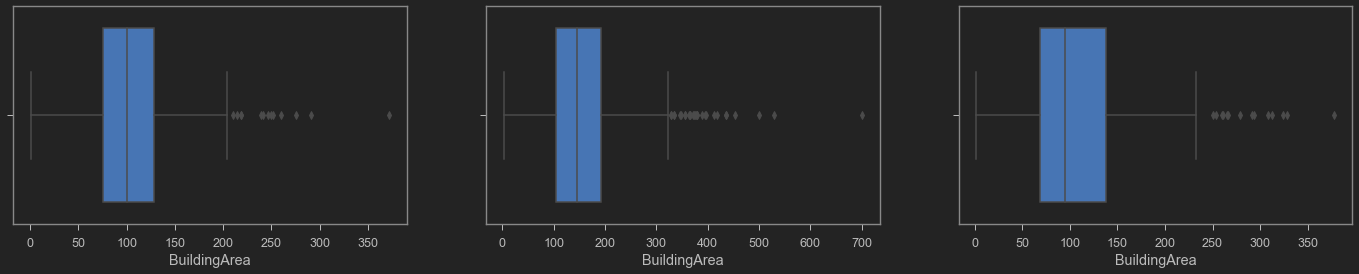

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[0]) & (df['BuildingArea']>0)]['BuildingArea'], ax=axes[0]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[1]) & (df['BuildingArea']>0)]['BuildingArea'], ax=axes[1]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[2]) & (df['BuildingArea']>0)]['BuildingArea'], ax=axes[2]);
plt.show()

# Pada Building size juga terdeteksi outliers maka fillna akan dilakukan dengan median

In [35]:
ps1 = df.loc[(df['BuildingArea'].isna()), 'CouncilArea'].unique()
oz = np.arange(1,50000, 200)
for i in ps1:
    for j in range(len(oz)):
        df.loc[ (df['CouncilArea']==i) &(df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+200) & (df['BuildingArea'].isna()), 'BuildingArea'] = df.loc[(df['CouncilArea']==i) & (df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+200) & (df['BuildingArea'].isna()), 'BuildingArea'].fillna(df.loc[(df['CouncilArea']==i) & (df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+200),'BuildingArea'].median())

# Memfillna Building Area dengan median berdasarkan range landsize dan council area

In [36]:

print(df['BuildingArea'].isna().sum())
df.loc[(df['BuildingArea'].isna())]
# 120 rows tedeteksi masih bernilai Nan

120


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
919,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,2016-08-28,9.2,3104.0,1.0,2.0,75100.0,NaN,NaN,Boroondara City Council,-37.80020,145.07000,Southern Metropolitan,7809.0
2029,Burwood,18 Murray Dr,4,h,1800000.0,PI,Jellis,2016-06-18,11.7,3125.0,2.0,2.0,1393.0,NaN,1963.0,Monash City Council,-37.84630,145.10200,Southern Metropolitan,5678.0
3189,Essendon North,1 Dudley St,3,h,1425000.0,S,McGrath,2017-02-25,9.4,3041.0,2.0,2.0,10100.0,NaN,NaN,Moonee Valley City Council,-37.73760,144.89540,Western Metropolitan,1308.0
3404,Footscray,13/2 Saltriver Pl,3,u,674000.0,S,Jellis,2017-11-02,6.4,3011.0,2.0,1.0,8680.0,NaN,NaN,Maribyrnong City Council,-37.80160,144.90820,Western Metropolitan,7570.0
3706,Glenroy,6/2 Murrell St,2,u,320500.0,S,Nelson,2016-09-17,13.0,3046.0,1.0,1.0,3056.0,NaN,NaN,Moreland City Council,-37.70420,144.92140,Northern Metropolitan,8870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26164,Kalkallo,7 Malcolm St,3,h,615000.0,S,Barry,2018-03-17,20.6,3064.0,1.0,1.0,2023.0,NaN,NaN,Hume City Council,-37.53040,144.94824,Northern Metropolitan,121.0
26376,Seaford,15 East Rd,3,h,960000.0,S,Buxton,2018-03-17,35.4,3198.0,2.0,2.0,1228.0,NaN,NaN,Frankston City Council,-38.10471,145.14203,South-Eastern Metropolitan,8077.0
26584,Berwick,18 Casey Dr,5,h,2300000.0,S,Barry,2018-02-24,35.2,3806.0,3.0,2.0,4008.0,NaN,NaN,Casey City Council,-38.01620,145.34792,Eastern Victoria,17093.0
26946,Melton South,16 Toolern St,3,h,1152000.0,S,Barry,2018-02-24,29.8,3338.0,1.0,4.0,2148.0,NaN,NaN,Melton City Council,-37.70534,144.57709,Western Victoria,4718.0


In [37]:
oz = np.arange(1,500000, 500)
for j in range(len(oz)):
    df.loc[ (df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+500) & (df['BuildingArea'].isna()), 'BuildingArea'] = df.loc[ (df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+500) & (df['BuildingArea'].isna()), 'BuildingArea'].fillna(df.loc[(df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+500),'BuildingArea'].median())


# mengisi sisa missing values Building area dengan nilai median berdasarkan landsize.

In [38]:
df.loc[(df['BuildingArea'].isna())] # check ulang missing values di building Area

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
919,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,2016-08-28,9.2,3104.0,1.0,2.0,75100.0,NaN,NaN,Boroondara City Council,-37.80020,145.07000,Southern Metropolitan,7809.0
6650,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,2016-04-23,11.2,3073.0,1.0,2.0,41400.0,NaN,NaN,Darebin City Council,-37.71040,145.02570,Northern Metropolitan,21650.0
12847,Silvan,1 Parker Rd,4,h,1070000.0,S,Ray,2017-06-24,34.6,3795.0,2.0,3.0,38490.0,NaN,NaN,Yarra Ranges Shire Council,-37.83229,145.43003,Eastern Victoria,457.0
13444,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,2017-05-27,34.6,3795.0,2.0,2.0,76000.0,NaN,NaN,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0
14044,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-12-08,2.1,3065.0,3.0,1.0,433014.0,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0
15658,Kew East,9 Tanner Av,4,h,1600000.0,VB,Noel,2017-03-09,7.3,3102.0,2.0,2.0,12300.0,NaN,1940.0,Boroondara City Council,-37.79459,145.03921,Southern Metropolitan,2671.0
19415,Wildwood,430 Wildwood Rd,5,h,1030000.0,S,RE,2017-10-14,31.7,3429.0,2.0,2.0,89030.0,NaN,NaN,Hume City Council,-37.60400,144.80604,Western Metropolitan,83.0
21039,Bullengarook,65 Webb Rd,4,h,1050000.0,PI,Raine,2017-11-11,45.9,3437.0,2.0,1.0,146699.0,NaN,NaN,Macedon Ranges Shire Council,-37.47540,144.51300,Northern Victoria,249.0


In [39]:
df.loc[(df['BuildingArea'].isna()) & (df['Landsize']<15000), 'BuildingArea'] = df.loc[(df['BuildingArea'].isna()) & (df['Landsize']<15000), 'BuildingArea'] .fillna(df.loc[(df['Landsize']<15000), 'BuildingArea'].median())
df.loc[(df['BuildingArea'].isna()) & (df['Landsize']>35000), 'BuildingArea'] = df.loc[(df['BuildingArea'].isna()) & (df['Landsize']>35000), 'BuildingArea'] .fillna(df.loc[(df['Landsize']>35000), 'BuildingArea'].median())

# fill kembali sisa nan

In [40]:
df.loc[(df['BuildingArea'].isna())]
# re check hasil fill

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [41]:
ps1= df['CouncilArea'].unique()

In [42]:
df.isna().sum()

# Check missing values di features2 lain

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize             0
BuildingArea         0
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

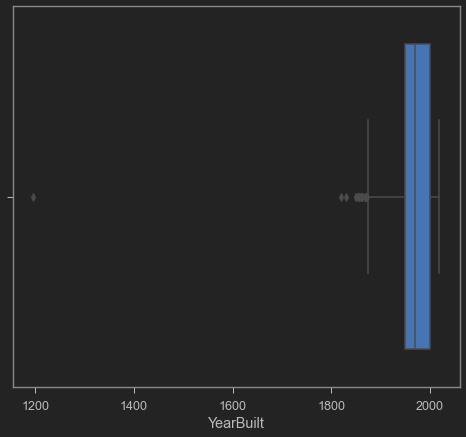

In [43]:
sns.boxplot(x=df['YearBuilt']);

# Melihat Boxplot dari Yearbuilt
# Terlihat adanya outliers, ada data dimana rumah tahun dibangunnya dibawah tahun 1200, Negara Australia sendiri ditemukan tahun 1788 jadi ini bisa dipastikan kesalahan pada data dan akan direplace dengan median beradasarkan council area

In [44]:
df.loc[(df['YearBuilt']<1250), 'YearBuilt'] = df.loc[df['CouncilArea']=='Monash City Council','YearBuilt'].median()

# akan direplace dengan median berdasarkan council area

In [45]:
df.loc[df['YearBuilt']<1250]
# Check kembali data yang di replace

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [46]:
df.loc[df['YearBuilt'].isna()]

# CHeck Missing Values di Year Built

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,140.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,95.0,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,95.0,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,139.0,95.0,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,87.0,95.0,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27234,Wollert,10 Alma Rd,4,h,630000.0,SP,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,388.0,140.0,NaN,Whittlesea City Council,-37.60981,145.04135,Northern Metropolitan,2940.0
27236,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,375.0,140.0,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
27238,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,NaN,288.0,120.0,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
27239,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,128.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0


In [47]:
mask4 = (df['YearBuilt'].isna())
# Buat variable untuk store kondisi, agar lebih rapi dalam penulisan code

In [48]:
for i in ps1:
    df.loc[(df['CouncilArea']==i) & mask4, 'YearBuilt'] = df.loc[(df['CouncilArea']==i) & mask4, 'YearBuilt'].fillna(df.loc[(df['CouncilArea']==i), 'YearBuilt'].median())

# Fillna dengan median berdasarkan tiap Council Area nya

In [49]:
df.isna().sum()

# Check ulang missing values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom         6444
Car              6821
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        6251
Longtitude       6251
Regionname          0
Propertycount       0
dtype: int64

In [50]:
# Cek Missing Values di Bathroom
df.loc[df['Bathroom'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,139.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,87.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,NaN,NaN,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,NaN,NaN,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,NaN,NaN,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,NaN,NaN,83.5,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27228,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,NaN,NaN,83.5,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27229,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,NaN,NaN,169.0,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27233,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,NaN,NaN,84.5,83.5,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [51]:
bath_na = (df['Bathroom'].isna())
for i in ps1:
    for j in df.loc[df['Bathroom'].isna(),'Rooms'].unique():
        df.loc[(df['CouncilArea']==i) & (df['Rooms']==j) & bath_na,'Bathroom'] = df.loc[(df['CouncilArea']==i) & (df['Rooms']==j) & bath_na,'Bathroom'] .fillna(df.loc[(df['CouncilArea']==i) & (df['Rooms']==j),'Bathroom'].median())

# Fillna dengan nilai median bathroom berdasarkan Council Area dan jumlah kamarnya

In [52]:
df.loc[df['Bathroom'].isna()]

# Sisa 8 Missing Values karena tidak ditemukan nilai median dari council area dan jumlah kamarnya.
# Maka akan di fill berdasarkan jumlah kamar saja

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3752,Glenroy,6 Pengana Av,6,h,1035000.0,S,Nelson,2016-06-27,13.0,3046.0,NaN,NaN,362.0,120.0,1960.0,Moreland City Council,NaN,NaN,Northern Metropolitan,8870.0
5801,Oakleigh South,17 Windsor Av,9,h,1380000.0,S,Ray,2016-10-09,14.7,3167.0,NaN,NaN,635.5,160.0,1970.0,Kingston City Council,NaN,NaN,South-Eastern Metropolitan,3692.0
5848,Parkville,42 Park Dr,8,u,3210000.0,S,Kelly,2016-10-12,2.6,3052.0,NaN,NaN,340.0,147.0,1975.0,Melbourne City Council,NaN,NaN,Northern Metropolitan,2309.0
5854,Parkville,84 Flemington Rd,10,h,2800000.0,VB,Nelson,2016-04-16,2.6,3052.0,NaN,NaN,272.5,147.0,1975.0,Melbourne City Council,-37.7889,144.9421,Northern Metropolitan,2309.0
9453,Altona North,60 Rosala Av,7,h,1130000.0,S,Jas,2017-05-20,11.1,3025.0,NaN,NaN,452.0,145.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,5132.0
10082,Hawthorn,10 Berkeley St,12,h,4700000.0,PI,Property,2017-05-20,4.6,3122.0,NaN,NaN,800.0,219.5,1960.0,Boroondara City Council,-37.8303,145.0367,Southern Metropolitan,11308.0
14786,Fitzroy,201 Gore St,6,h,2590000.0,S,Nelson,2017-07-22,2.1,3065.0,NaN,NaN,205.0,140.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,5825.0
15298,Plenty,2 Hawk Vw,1,h,942000.0,S,Ray,2017-07-29,20.1,3090.0,NaN,NaN,601.0,138.5,2008.0,Nillumbik Shire Council,NaN,NaN,Northern Victoria,777.0
21128,Epping,32/12 Kirkland Ct,1,h,273000.0,S,HAR,2017-11-11,19.6,3076.0,NaN,NaN,306.0,140.0,1995.0,Whittlesea City Council,NaN,NaN,Northern Metropolitan,10926.0
22109,Thomastown,2/28 Mulga St,1,u,315000.0,S,HAR,2017-11-18,15.3,3074.0,NaN,NaN,216.0,140.0,1995.0,Whittlesea City Council,NaN,NaN,Northern Metropolitan,7955.0


In [53]:
for i in df.loc[df['Bathroom'].isna(), 'Rooms'].unique():
    df.loc[(df['Rooms']==i) & bath_na,'Bathroom'] = df.loc[(df['Rooms']==i) & bath_na,'Bathroom'].fillna(df.loc[df['Rooms']==i,'Bathroom'].median())

df.loc[df['Bathroom'].isna(),'Bathroom'] = df.loc[df['Rooms']>5,'Bathroom'].median() # tersisa 1 dengan kamar 9 yang bathroom nya masih Nan
# Fillna dengan nilai median berdasarkan jumlah kamar

In [54]:
# Check kembali missing values
df.loc[df['Bathroom'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [55]:
# Cek missing values di Kolom Car
df.loc[df.Car.isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,2.0,NaN,139.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,1.0,NaN,87.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,1.0,NaN,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,1.0,NaN,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,1.0,NaN,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27229,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,1.0,NaN,169.0,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27231,Williamstown,34 Twyford St,3,h,1400000.0,SP,Sweeney,2018-02-24,6.8,3016.0,2.0,NaN,325.0,158.0,1995.0,Hobsons Bay City Council,-37.86871,144.90124,Western Metropolitan,6380.0
27233,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,1.0,NaN,84.5,83.5,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0
27238,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,NaN,288.0,120.0,1960.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0


In [56]:
df.loc[(df['CouncilArea']=='Monash City Council') & (df['Landsize']>=0) & (df['Landsize']<2000),'Car'].median()

2.0

In [57]:
car_nan = (df['Car'].isna())
for i in ps1:
    for j in np.arange(0,df['Landsize'].max(),200):
        df.loc[(df['CouncilArea']==i) & (df['Landsize']>=j) & (df['Landsize']<j+200) & car_nan,'Car'] = df.loc[(df['CouncilArea']==i) & (df['Landsize']>=j) & (df['Landsize']<j+200) & car_nan,'Car'].fillna(df.loc[(df['CouncilArea']==i) & (df['Landsize']>=j) & (df['Landsize']<j+200),'Car'].median())
        
# Fillna kolom car dengan median berdasarkan Area Council dan range Landsize nya.

In [58]:
df.loc[(df['Car'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
16499,Fitzroy North,90 Bennett St,3,h,1400000.0,PI,McGrath,2017-09-16,3.6,3068.0,2.0,NaN,9338.0,134.0,1960.0,Moreland City Council,-37.78101,144.98843,Northern Metropolitan,6244.0
17981,Carlton,50 Dorrit St,3,h,1760000.0,S,hockingstuart,2017-08-26,1.6,3053.0,1.0,NaN,9405.0,134.0,1880.0,Melbourne City Council,-37.79945,144.96653,Northern Metropolitan,6786.0
20630,Port Melbourne,220 Nott St,3,h,1585000.0,S,Marshall,2017-10-28,3.5,3207.0,2.0,NaN,9071.0,134.0,1910.0,Melbourne City Council,-37.83504,144.94414,Southern Metropolitan,8648.0
20649,Princes Hill,209 Richardson St,2,h,938000.0,S,Collins,2017-10-28,3.5,3054.0,1.0,NaN,8970.0,77.0,1950.0,Yarra City Council,-37.78440,144.96876,Northern Metropolitan,1008.0
20999,Boronia,992 Mountain Hwy,4,h,1606000.0,SP,Barry,2017-11-11,25.0,3155.0,2.0,NaN,3381.0,75.0,1980.0,Knox City Council,-37.83840,145.29150,Eastern Metropolitan,9704.0
24067,South Melbourne,9 Queen St,3,h,1071000.0,S,Greg,2017-09-12,1.9,3205.0,1.0,NaN,6880.0,63.0,1940.0,Port Phillip City Council,-37.83517,144.95471,Southern Metropolitan,5943.0
25717,Taylors Hill,14 Shearwater Ct,5,h,1016000.0,S,Prof.,2018-02-17,18.0,3037.0,2.5,NaN,1418.0,201.5,1998.5,Melton City Council,NaN,NaN,Western Metropolitan,4242.0


In [59]:
for i in df.loc[df['Car'].isna(),'CouncilArea']:
    df.loc[(df['Car'].isna()) & (df['Rooms']>=2) & (df['Rooms']<6),'Car'] = df.loc[(df['Car'].isna()) & (df['Rooms']>=2) & (df['Rooms']<6),'Car'].fillna(df.loc[(df['Rooms']>=2) & (df['Rooms']<6),'Car'].median())

# Fill dengan median range room 2-5

In [60]:
df.loc[df.Car.isna()] # cek kembali Nan values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [61]:
# Handling Missing values di kolom Lat dan Lon

df.loc[df['Lattitude'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,2.0,1.0,139.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,1.0,1.0,87.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,1.0,1.0,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,1.0,1.0,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,1.0,1.0,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,1.0,1.0,83.5,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27228,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,1.0,1.0,83.5,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27229,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,1.0,1.0,169.0,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27233,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,1.0,1.0,84.5,83.5,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


Menggunakan ``pandas.DataFrame.interpolate`` [Reference](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.interpolate.html) untuk fillna longitude dan lattitude

In [92]:
df1 = df.copy()

In [93]:
# df1.loc[df1['Suburb']=='Yarraville']

In [94]:
subs = df['Suburb'].unique()
for i in subs:
    df1.loc[(df1['Suburb']==i) & (df1['Lattitude'].isna()), 'Lattitude'] = df1.loc[(df1['Suburb']==i) & (df1['Lattitude'].isna()), 'Lattitude'].fillna(df1.loc[(df1['Suburb']==i), 'Lattitude'].interpolate(method='linear'))

# Using pandas .interpolate to fillna the Lattitude berdasarkan tiap suburb

In [95]:
for i in subs:
    df1.loc[(df1['Suburb']==i) & (df1['Longtitude'].isna()), 'Longtitude'] = df1.loc[(df1['Suburb']==i) & (df1['Longtitude'].isna()), 'Longtitude'].fillna(df1.loc[(df1['Suburb']==i), 'Longtitude'].interpolate(method='linear'))

# Using pandas .interpolate to fillna the Longitude berdasarkan tiap suburb

In [96]:
subs2 = df1.loc[(df1['Lattitude'].isna()) & (df1['Longtitude'].isna()),'Suburb'].unique()
df1.loc[(df1['Lattitude'].isna()) & (df1['Longtitude'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
593,Avondale Heights,13 MacEy Av,4,h,1310000.0,S,Jellis,2016-03-09,10.5,3034.0,2.0,2.0,566.0,161.5,1966.5,Moonee Valley City Council,NaN,NaN,Western Metropolitan,4502.0
2652,Coburg North,17 Lorensen Av,3,h,845000.0,S,Nelson,2016-03-09,9.2,3058.0,1.0,2.0,493.0,135.0,1960.0,Darebin City Council,NaN,NaN,Northern Metropolitan,3445.0
2653,Coburg North,22 Ballard Av,3,h,751000.0,SP,Melbourne,2016-03-12,9.2,3058.0,1.0,2.0,493.0,135.0,1960.0,Darebin City Council,NaN,NaN,Northern Metropolitan,3445.0
3625,Glenroy,2/13 Becket St S,3,t,585000.0,S,Stockdale,2016-03-09,13.0,3046.0,1.0,1.0,160.0,89.0,1960.0,Moreland City Council,NaN,NaN,Northern Metropolitan,8870.0
3958,Hampton East,20 Highbury Av,4,h,1525000.0,S,Marshall,2016-03-09,14.5,3188.0,2.0,2.0,604.0,202.0,1970.0,Bayside City Council,NaN,NaN,Southern Metropolitan,2356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26196,MacLeod,3/64 Erskine Rd,3,t,770000.0,PI,Fletchers,2018-03-17,12.7,3085.0,1.0,1.0,188.0,93.0,1970.0,Banyule City Council,NaN,NaN,Northern Metropolitan,4168.0
26919,MacLeod,33 Erskine Rd,4,h,835000.0,S,Ray,2018-02-24,12.7,3085.0,2.0,2.0,594.0,134.0,1970.0,Banyule City Council,NaN,NaN,Northern Metropolitan,4168.0
26920,MacLeod,2/73 Greensborough Rd,3,t,820000.0,S,Jellis,2018-02-24,12.7,3085.0,1.0,1.0,188.0,93.0,1970.0,Banyule City Council,NaN,NaN,Northern Metropolitan,4168.0
26921,MacLeod,19 Lindsay St,3,h,820000.0,VB,Jellis,2018-02-24,12.7,3085.0,1.0,2.0,594.0,134.0,1970.0,Banyule City Council,NaN,NaN,Northern Metropolitan,4168.0


In [97]:
for i in subs2:
    df1.loc[(df1['Suburb']==i) & (df1['Lattitude'].isna()), ['Lattitude']] = df1.loc[(df1['Suburb']==i) & (df1['Lattitude'].isna()), ['Lattitude']].fillna(df1.loc[(df1['Suburb']==i),['Lattitude']].interpolate(), axis=1)
    df1.loc[(df1['Suburb']==i) & (df1['Longtitude'].isna()), ['Longtitude']] = df1.loc[(df1['Suburb']==i) & (df1['Longtitude'].isna()), ['Longtitude']].fillna(df1.loc[(df1['Suburb']==i),['Longtitude']].interpolate(), axis=1)

# Fillna sisa nan yang belum terhandle

Menggunakan ``.Interpolate, Axis 1`` Untuk mengisi sisa missing values di Longitude dan Lattitude [Reference](https://stackoverflow.com/questions/61251268/pandas-interpolation-between-columns) berdasarkan suburb nya

In [98]:
df.loc[df['Lattitude'].isna()] # Check hasil fillna

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,2.0,1.0,139.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,1.0,1.0,87.0,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,1.0,1.0,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,1.0,1.0,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,1.0,1.0,97.5,95.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,1.0,1.0,83.5,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27228,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,1.0,1.0,83.5,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27229,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,1.0,1.0,169.0,83.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27233,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,1.0,1.0,84.5,83.5,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [99]:
df1.drop(df1.loc[df1['Lattitude'].isna()].index, inplace=True)
df1.drop(df1.loc[df1['Longtitude'].isna()].index, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [100]:
print(df1.shape)
df1.isna().sum()

# Check Missing values kembali
# dapat terlihat data sudah bersih dari missing values

(27074, 20)


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Checking Outliers and odd/weird values

In [101]:
object_col = df1.select_dtypes(include=['object']).columns
df_non_object = df1.drop(columns=[i for i in object_col])
df_non_object = df_non_object.drop(columns=['Date'])

# Menngambil Kolom yang non object

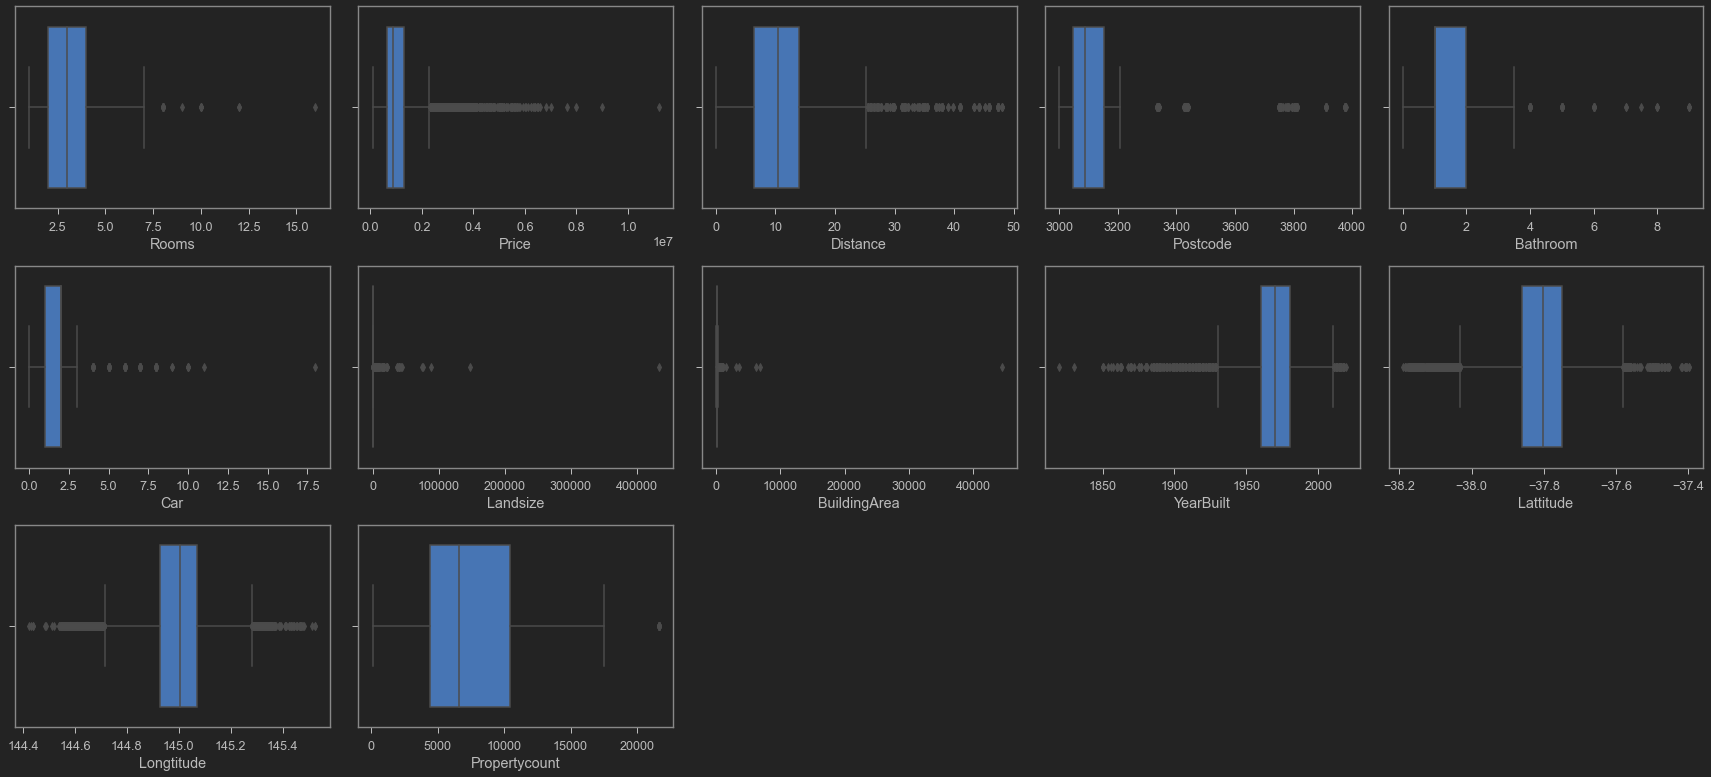

In [102]:
plt.figure(figsize=(24,14))
n = 1
for i in df_non_object.columns:
    plt.subplot(4,5,n)
    sns.boxplot(x=df1[i])
    n+=1
    
plt.tight_layout()
plt.show()


In [103]:
df1.loc[df1['Landsize']>45000]

# Setelah melakukan pengecekan melalui web search, ternyata memang betul ada nya rumah rumah yang luas tanahnya sungguh sangat fantastis

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
918,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,2016-08-28,9.2,3104.0,1.0,2.0,75100.0,245.0,1960.0,Boroondara City Council,-37.80020,145.07000,Southern Metropolitan,7809.0
13340,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,2017-05-27,34.6,3795.0,2.0,2.0,76000.0,245.0,1980.0,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0
13939,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-12-08,2.1,3065.0,3.0,1.0,433014.0,245.0,1950.0,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0
19285,Wildwood,430 Wildwood Rd,5,h,1030000.0,S,RE,2017-10-14,31.7,3429.0,2.0,2.0,89030.0,245.0,1990.0,Hume City Council,-37.60400,144.80604,Western Metropolitan,83.0
20898,Bullengarook,65 Webb Rd,4,h,1050000.0,PI,Raine,2017-11-11,45.9,3437.0,2.0,1.0,146699.0,245.0,1985.0,Macedon Ranges Shire Council,-37.47540,144.51300,Northern Victoria,249.0


In [104]:
df1.loc[df1['BuildingArea']>40000]

# Setelah melakukan pengecekan melalui web search, memang betul rumah dibawah ini ada dengan luas tanah 4.45 hectare namun luas bangunan 4.45 ha nampaknya mustahil. kemungkinan besar typo pada 2 angka awal.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17536,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,2017-09-23,48.1,3438.0,3.0,5.0,44500.0,44515.0,1985.0,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0


In [105]:
df1.loc[df1['BuildingArea']>40000, 'BuildingArea'] = 515

In [106]:
df1.loc[df1['Landsize']>40000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
918,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,2016-08-28,9.2,3104.0,1.0,2.0,75100.0,245.0,1960.0,Boroondara City Council,-37.80020,145.07000,Southern Metropolitan,7809.0
6632,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,2016-04-23,11.2,3073.0,1.0,2.0,41400.0,245.0,1960.0,Darebin City Council,-37.71040,145.02570,Northern Metropolitan,21650.0
13340,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,2017-05-27,34.6,3795.0,2.0,2.0,76000.0,245.0,1980.0,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0
13939,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-12-08,2.1,3065.0,3.0,1.0,433014.0,245.0,1950.0,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0
14340,Gisborne,21 Braeside Rd,4,h,807000.0,S,Raine,2017-07-15,45.9,3437.0,2.0,3.0,40468.0,245.0,1985.0,Macedon Ranges Shire Council,-37.50929,144.56444,Northern Victoria,3376.0
17536,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,2017-09-23,48.1,3438.0,3.0,5.0,44500.0,515.0,1985.0,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0
19285,Wildwood,430 Wildwood Rd,5,h,1030000.0,S,RE,2017-10-14,31.7,3429.0,2.0,2.0,89030.0,245.0,1990.0,Hume City Council,-37.60400,144.80604,Western Metropolitan,83.0
20207,Gisborne South,31 Stanton Ct,3,h,930000.0,S,Raine,2017-10-28,45.9,3437.0,2.0,4.0,40468.0,215.0,1985.0,Macedon Ranges Shire Council,-37.54812,144.63257,Northern Victoria,290.0
20898,Bullengarook,65 Webb Rd,4,h,1050000.0,PI,Raine,2017-11-11,45.9,3437.0,2.0,1.0,146699.0,245.0,1985.0,Macedon Ranges Shire Council,-37.47540,144.51300,Northern Victoria,249.0
21458,Bullengarook,172 Fitzgerald Rd,6,h,1430000.0,S,Keatings,2017-11-18,45.9,3437.0,4.0,5.0,40469.0,386.0,1983.0,Macedon Ranges Shire Council,-37.47650,144.49000,Northern Victoria,249.0


In [81]:
# Check Bathrooms 0 values

df1.loc[df['Bathroom']<1]

# Terdapat rows yang memiliki values 0 pada kolom bathroom, hal yang cukup mustahil jika menjual rumah tanpa bathroom
# Maka 0 values akan di treat seperti missing values dan akan diisi dengan median berdasarkan jumlah kamar rumah tersebut

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
188,Alphington,6 Naroon Rd,3,h,1485000.0,SP,McGrath,2016-08-28,6.4,3078.0,0.0,0.0,597.0,135.0,1960.0,Darebin City Council,-37.778100,145.028400,Northern Metropolitan,2211.0
381,Armadale,3/50 Denbigh Rd,2,u,546000.0,SP,hockingstuart,2016-07-30,6.3,3143.0,0.0,0.0,84.5,82.0,1951.0,Stonnington City Council,-37.856800,145.016100,Southern Metropolitan,4836.0
679,Balwyn,166 Gordon St,2,h,2100000.0,S,Marshall,2016-03-09,9.7,3103.0,1.0,1.0,659.0,123.0,1920.0,Boroondara City Council,-37.809400,145.080700,Southern Metropolitan,5682.0
791,Balwyn North,3/41 Clifton St,3,t,1315000.0,S,hockingstuart,2016-03-09,9.2,3104.0,2.0,2.0,260.0,167.0,2000.0,Boroondara City Council,-37.796600,145.102100,Southern Metropolitan,7809.0
1223,Bentleigh East,10 Boronia St,4,h,1698888.0,S,hockingstuart,2016-08-22,13.9,3165.0,2.0,2.0,598.0,337.0,2006.0,Glen Eira City Council,-37.913800,145.077400,Southern Metropolitan,10969.0
1402,Brighton,74 Carpenter St,5,h,2750000.0,VB,Buxton,2016-07-05,11.2,3186.0,3.0,1.0,509.0,341.0,2005.0,Bayside City Council,-37.911800,144.998400,Southern Metropolitan,10579.0
1410,Brighton,72 William St,3,h,1865000.0,VB,hockingstuart,2016-07-05,11.2,3186.0,2.0,2.0,295.0,143.0,1970.0,Bayside City Council,-37.911900,145.003700,Southern Metropolitan,10579.0
2107,Camberwell,110 Rowell Av,3,h,2200000.0,PI,Noel,2016-04-16,7.8,3124.0,2.0,2.0,714.0,219.5,1960.0,Boroondara City Council,-37.834000,145.075650,Southern Metropolitan,8920.0
2923,Elwood,1/10 Wilton Gr,3,t,1350000.0,S,hockingstuart,2016-03-09,7.7,3184.0,2.0,2.0,1170.0,69.5,1940.0,Port Phillip City Council,-37.883100,144.980100,Southern Metropolitan,8989.0
3521,Glen Iris,1/4 Estella St,4,h,1870000.0,S,Marshall,2016-10-12,9.2,3146.0,2.0,2.0,603.5,219.5,1960.0,Boroondara City Council,-37.852500,145.077950,Southern Metropolitan,10412.0


In [84]:
df1.loc[[188,381]]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
188,Alphington,6 Naroon Rd,3,h,1485000.0,SP,McGrath,2016-08-28,6.4,3078.0,0.0,0.0,597.0,135.0,1960.0,Darebin City Council,-37.7781,145.0284,Northern Metropolitan,2211.0
381,Armadale,3/50 Denbigh Rd,2,u,546000.0,SP,hockingstuart,2016-07-30,6.3,3143.0,0.0,0.0,84.5,82.0,1951.0,Stonnington City Council,-37.8568,145.0161,Southern Metropolitan,4836.0


In [85]:
subs3 = df1.loc[(df1['Bathroom']==0),'Suburb'].unique()
for i in subs3:
    for j in df1.loc[(df1['Bathroom']==0),'Rooms'].unique():
        df1.loc[(df1['Suburb']==i) & (df1['Bathroom']==0) & (df1['Rooms']==j),'Bathroom'] = df1.loc[(df1['Suburb']==i) & (df1['Bathroom']==0) & (df1['Rooms']==j),'Bathroom'].replace(0,df1.loc[(df1['Suburb']==i) & (df1['Rooms']==j),'Bathroom'].median())
        
# Replace dengan median dari bathroom berdasarkan setiap suburb dan jumlah kamarnya

In [86]:
df1.loc[df1['Bathroom']==0] # Check ulang apakah masih ada values 0

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [87]:
df1.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [88]:
df1.shape

(27074, 20)

In [ ]:
# df.loc[(df['Rooms']<4) & (df['Distance']<15) & (df['Method']!='VB') & (df['Method']!='PI') &  (df['Type']=='h')]

In [89]:
df1.to_csv('MelbourneCleanInterpolate.csv',index=False)

# Export file yang sudah dibersihkan